In [23]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('airfares.csv')
df.head()

,observation_date,observation_time,origin,destination,market,carrier,flight_number,departure_date,departure_time,fare_basis,booking_class,price_exc_tax,tax,price,currency
0,2019-01-12,02:33:00,BOS,LGA,BOSLGA,BB,2118,2019-05-02,14:00:00,B63AA,B,63.26,19.04,82.3,USD
1,2019-01-12,02:36:00,BOS,LGA,BOSLGA,BB,2118,2019-05-12,14:00:00,B63AA,B,63.26,19.04,82.3,USD
2,2019-01-12,02:33:00,BOS,LGA,BOSLGA,BB,2118,2019-05-01,14:00:00,B63AA,B,63.26,19.04,82.3,USD
3,2019-01-12,02:34:00,BOS,LGA,BOSLGA,BB,2118,2019-05-06,14:00:00,B63AA,B,63.26,19.04,82.3,USD
4,2019-01-12,02:35:00,BOS,LGA,BOSLGA,BB,2118,2019-05-07,14:00:00,B63AA,B,63.26,19.04,82.3,USD


In [26]:
df.shape

(1135211, 15)

In [10]:
#Part 1: Identifying unique markets

unique_markets = df['market'].nunique()
unique_markets

5

In [11]:
#Calculating average price per market
average_price_per_market = df.groupby('market')['price'].mean().reset_index()
average_price_per_market

,market,price
0,ABQJFK,172.383544
1,AUSMCO,116.349139
2,BOSLGA,111.809690
3,BOSRIC,121.245474
4,FLLPVD,143.380255


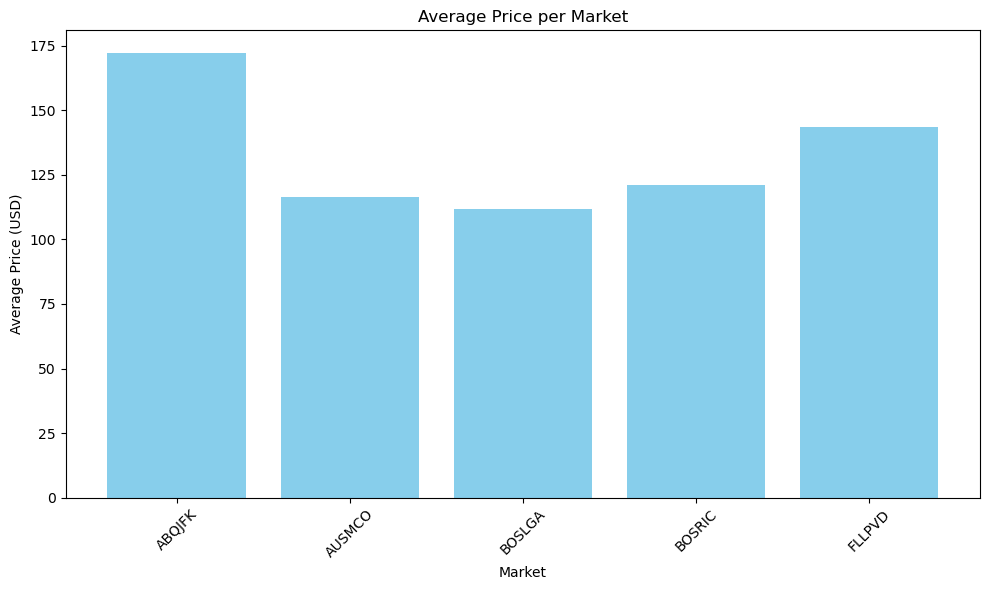

In [12]:
#Visualisation
plt.figure(figsize=(10, 6))
plt.bar(average_price_per_market['market'], average_price_per_market['price'], color='skyblue')
plt.title('Average Price per Market')
plt.xlabel('Market')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
#Total number of each carrier

total_flights_per_carrier = df['carrier'].value_counts().reset_index()
total_flights_per_carrier.columns = ['carrier', 'total_flights']
total_flights_per_carrier

,carrier,total_flights
0,EM,627460
1,C7,241575
2,BB,235455
3,OL,20347
4,G0,10374


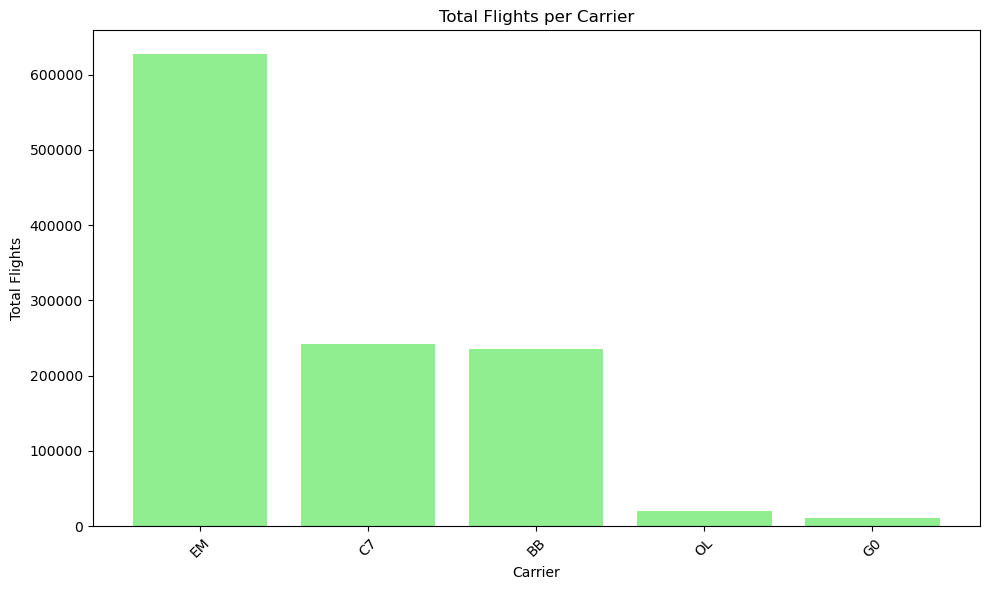

In [14]:
#Visualisation

plt.figure(figsize=(10, 6))
plt.bar(total_flights_per_carrier['carrier'], total_flights_per_carrier['total_flights'], color='lightgreen')
plt.title('Total Flights per Carrier')
plt.xlabel('Carrier')
plt.ylabel('Total Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
#Idenitifying top 5 markets with highest average fare

top_2_markets_highest_fare = average_price_per_market.sort_values(by='price', ascending=False).head(2)
top_2_markets_highest_fare

,market,price
0,ABQJFK,172.383544
4,FLLPVD,143.380255


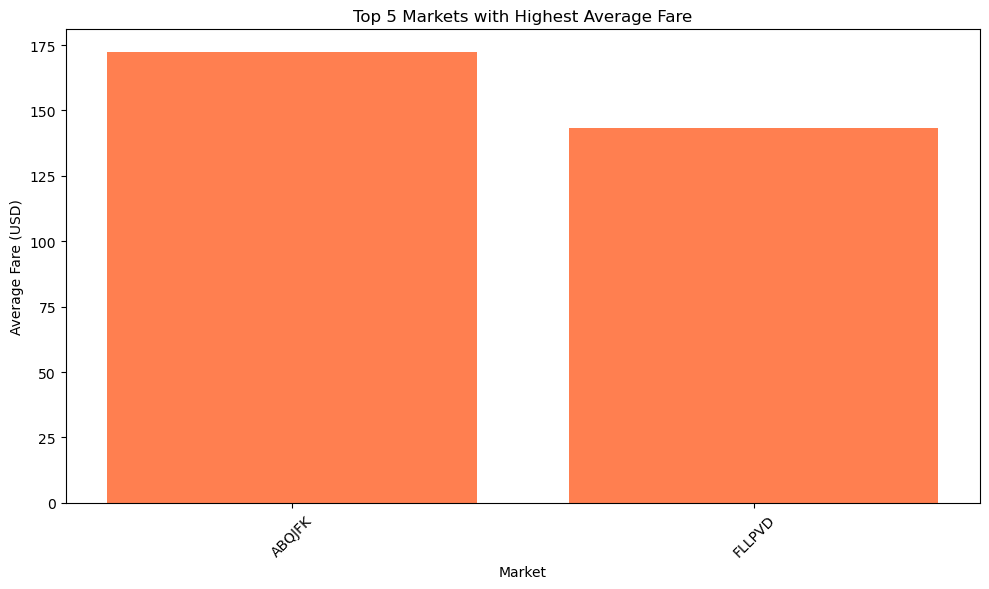

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(top_2_markets_highest_fare['market'], top_2_markets_highest_fare['price'], color='coral')
plt.title('Top 5 Markets with Highest Average Fare')
plt.xlabel('Market')
plt.ylabel('Average Fare (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
#Most frequent market

most_frequent_market = df['market'].value_counts().idxmax()
fare_distribution_most_frequent_market = df[df['market'] == most_frequent_market]['price']
fare_distribution_most_frequent_market.describe()

count    853613.000000
mean        111.809690
std          48.313285
min          48.300000
25%          82.300000
50%          97.300000
75%         112.300000
max         598.300000
Name: price, dtype: float64

In [18]:
VC = (48.31/111.8)*100        #Variation Coefficient ->   VC = (S / Mean) * 100
VC

43.21109123434705

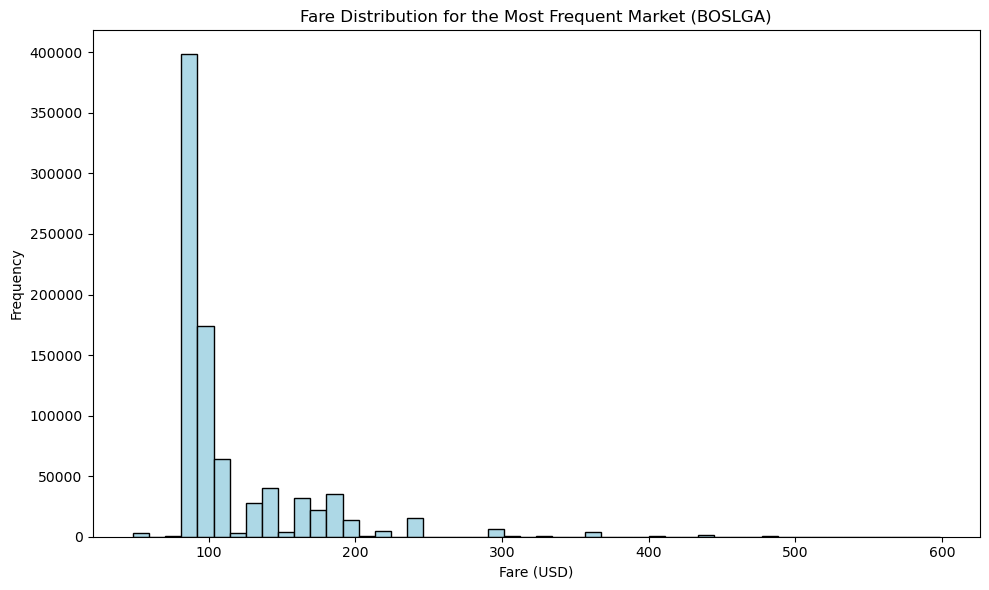

In [19]:
#Visualisation
plt.figure(figsize=(10, 6))
plt.hist(fare_distribution_most_frequent_market, bins=50, color='lightblue', edgecolor='black')
plt.title('Fare Distribution for the Most Frequent Market (BOSLGA)')
plt.xlabel('Fare (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# starts up and going down down down

In [20]:
#Comparing the fare prices between different booking classes

average_price_per_booking_class = df.groupby('booking_class')['price'].mean().reset_index()
average_price_per_booking_class

,booking_class,price
0,B,95.945242
1,D,146.828351
2,E,105.619066
3,G,60.934492
4,H,308.240378
5,K,211.488336
6,L,193.136088
7,M,204.900931
8,O,130.642214
9,P,80.741265


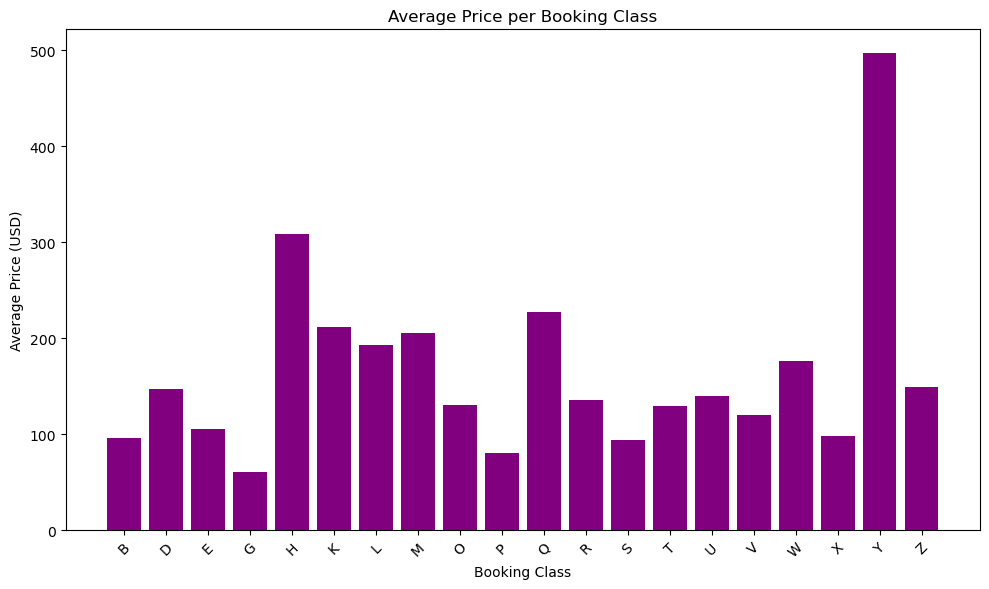

In [21]:
#Visualisation

plt.figure(figsize=(10, 6))
plt.bar(average_price_per_booking_class['booking_class'], average_price_per_booking_class['price'], color='purple')
plt.title('Average Price per Booking Class')
plt.xlabel('Booking Class')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()